In [1]:
# imports
import market_status as ms
from IPython.display import display, Markdown, Javascript
import pandas as pd
import datetime as dt
import os
import time

***
# **Market Status Notebook**
This notebook aims to provide comprehensive status of the market, which direction its heading and which sector is stronger than the other. All required code is written in python script ```market_status.py``` to save space. All days used in this notebook are meant as **trading** days.

**Stuff to implement**
- Options status for major indices
- Distribution days for indices (based on the "How to Make Money in Stocks" book)
- Add Nasdaq to indices overview (remove double stochastic, keep only VFI)
- IPOs from last week (use finviz screener) with basic stats (IPO date, industry)
- Crypto status (only the big ones compared to USD = BTC, ETH, další?)
- Screener for sector performers

## **```World Markets```**

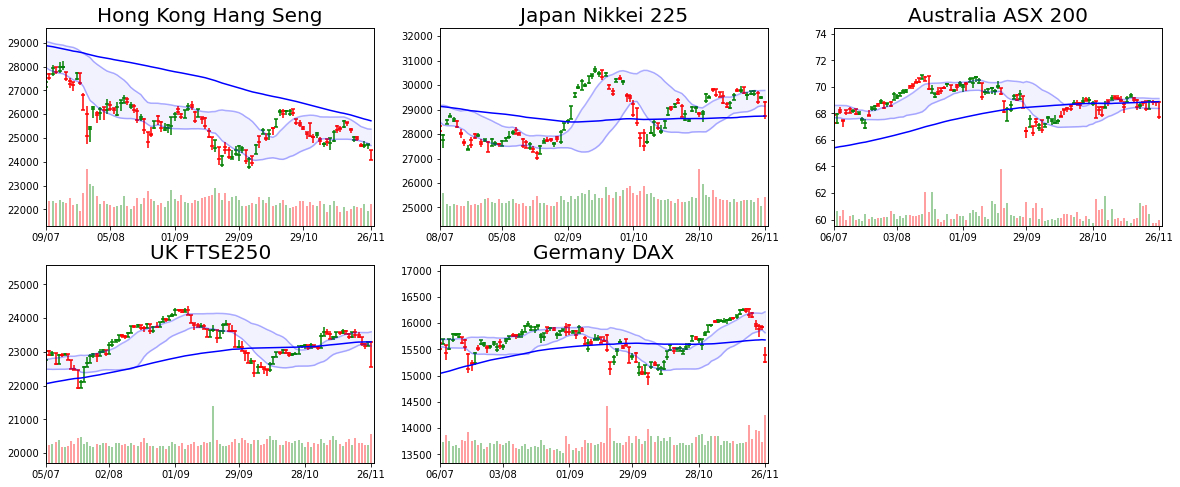

In [2]:
worldmarkets = ms.worldmarkets()
worldmarkets.show()

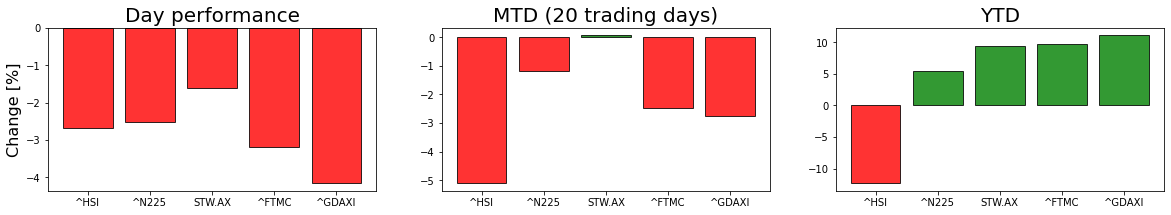

In [3]:
worldmarkets.performance()

***
## **``American markets``**
Spy = ETF following S&P500, IWM = ETF following Russell 2000 

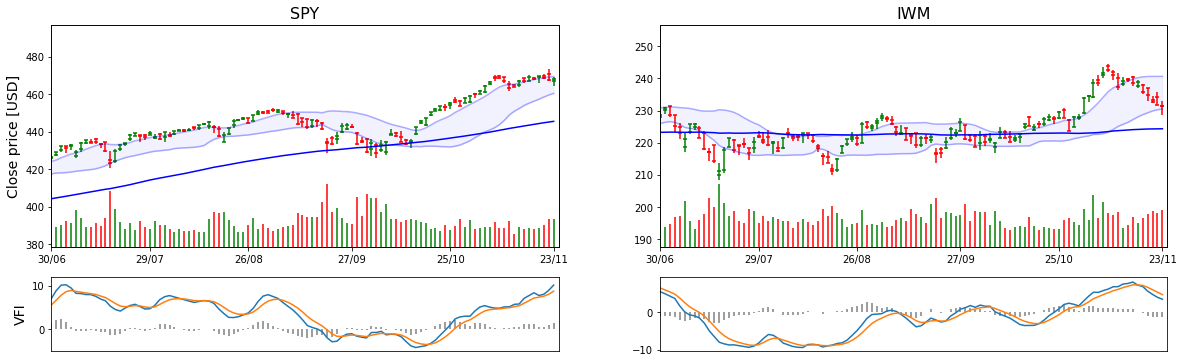

In [4]:
ms.show_usmarkets()

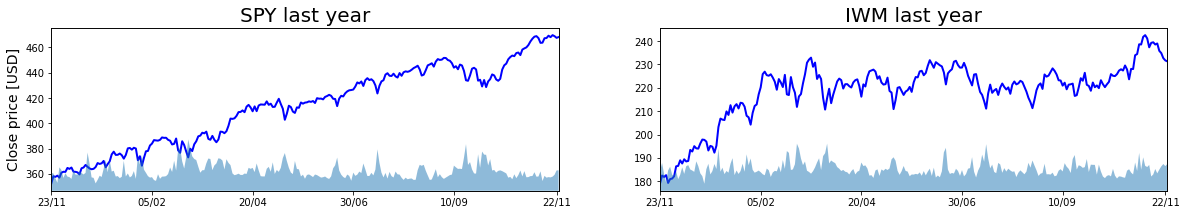

In [5]:
ms.longterm_usmarkets()

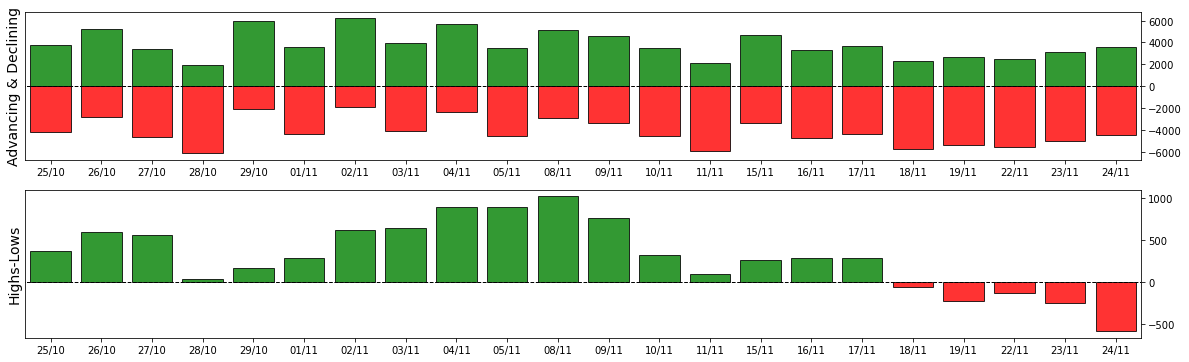

In [6]:
ms.momentum_usmarkets()

***
## **``Sectors``**
Explanations:
- Consumer Discretionary (cyclical) = goods and services that are considered non-essential by consumers, but desirable
- Consumer Staples (non-cyclical, defensive) = set of essential products used by consumers. This category includes things like foods and beverages, household goods, and hygiene products as well as alcohol and tobacco. 

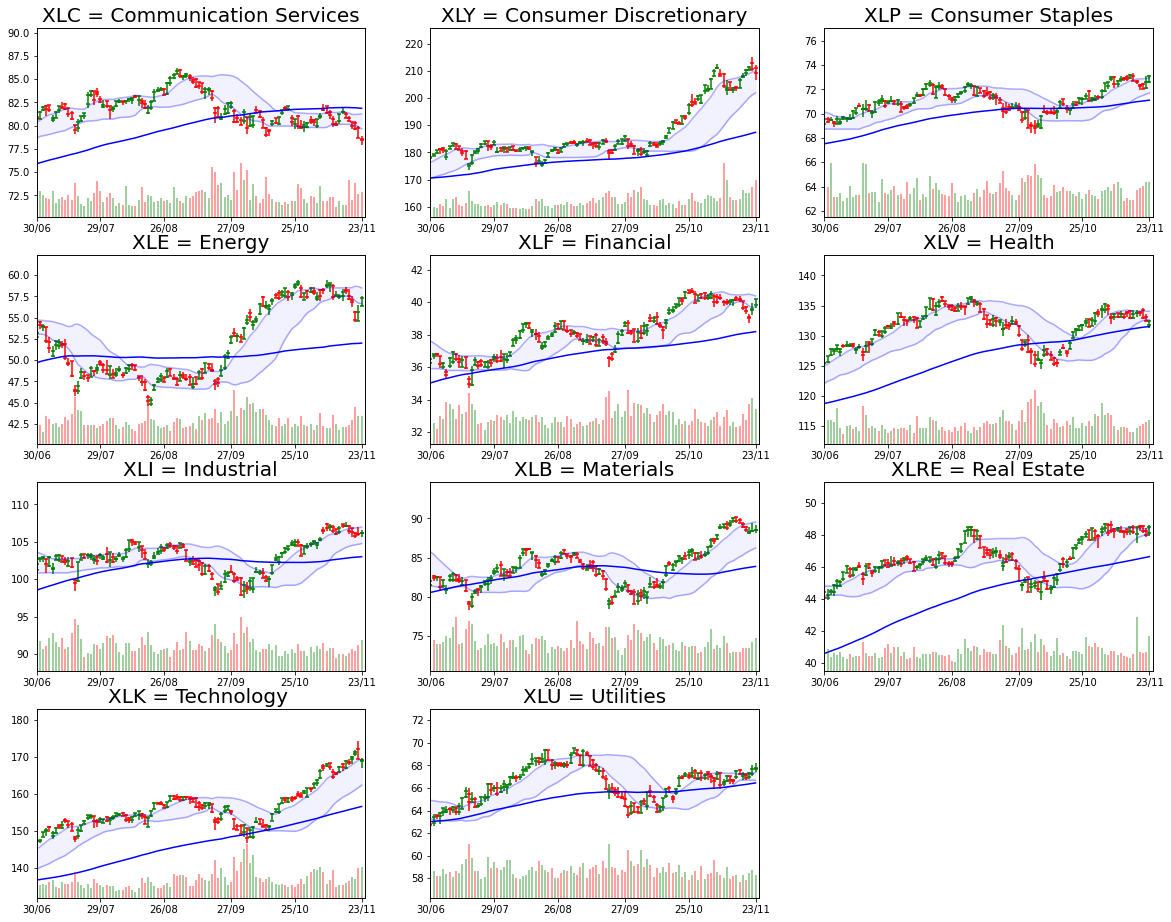

In [7]:
sectors = ms.sectors()
sectors.show()

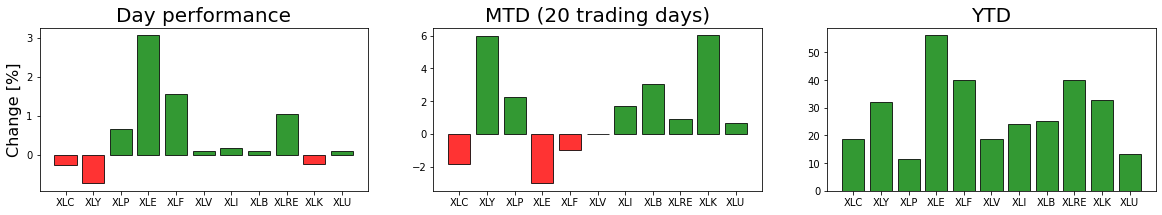

In [8]:
sectors.performance()

***
## **`Futures`**

In [2]:
futures = ms.futures()
futures.prettify(futures.returnfutures())

,Day,Week,Month,Quarter
Natural Gas,7.43,8.47,-8.48,30.47
Crude Oil WTI,-13.04,-10.23,-19.47,1.11
Crude Oil Brent,-11.35,-7.61,-15.64,2.56
Ethanol,0.59,0.59,-10.48,-4.72
Palladium,-5.11,-15.42,-12.53,-26.58
Copper,-4.04,-2.92,-4.61,0.74
Platinum,-2.30,-8.02,-7.75,-2.32
Silver,-1.49,-6.60,-3.91,-1.72
Gold,0.45,-3.20,-0.06,-0.16
Lumber,-2.78,-4.04,16.59,56.69


***
## **`Crypto`**

In [9]:
# outptut table with cryptos and their preformance in last day/week/month

***
## **``Finviz screeners``**
Following tables are results from pre-defined finviz screeners
<br><br>
**New high Breakouts** - [[Link]](https://finviz.com/screener.ashx?v=211&s=ta_newhigh&f=ind_stocksonly,sh_avgvol_o100,sh_float_o5,sh_relvol_o1)
<br>
Stocks with new 52 week highs, with float over 5M shares, average volume 100k and relative volume over 1. 

In [10]:
screeners = ms.screeners()
time.sleep(5)
nh = screeners.newhighs()
screeners.prettify(nh)

,0,1,2,3,4
0,MOV,DLTR,DOGZ,DDS,TITN
1,CSV,BRG,WRB,CLMT,LXU
2,WTFC,CPLP,ASGN,NMRK,TGLS
3,KFRC,VCRA,HBNC,PLYM,PFG
4,AFG,GATX,AAWW,HSY,RYAN
5,TD,KEYS,WIRE,ARW,PG
6,UMBF,GMS,ACM,FNF,EGP
7,CSX,INOV,TRNO,BCPC,COST
8,BUSE,BLDR,,,
9,,,,,


**50 day high with fundamentals** - [[Link]](https://finviz.com/screener.ashx?v=211&f=fa_debteq_u1,fa_eps5years_o10,fa_sales5years_o10,ind_stocksonly,sh_avgvol_o100,sh_float_o5,sh_relvol_o1,ta_highlow50d_nh)
<br>
Stocks which have 50 day highs with higher relative volume and basic fundamental filtration (dept/equity <1, sales and EPS growth in last 5 years larger than 10%)

In [11]:
time.sleep(5)
fd = screeners.fiftyday()
screeners.prettify(fd)

,0,1
0,AAWW,ASGN
1,BLDR,COST
2,DLTR,FNF
3,JD,LRCX
4,MU,RNR
5,SFM,TRNO
6,UMBF,WTFC
7,,
8,,
9,,


***
## **`New IPOs`**
New companies on the market during the last week, look for interesting price changes or so

---
## **``Other resources``**

List of other good resources to check (these will be hopefully implemented into this notebook later)

1. [Market momentum](https://www.barchart.com/stocks/momentum) - Watch for the number of stocks which are declining and advancing and overall number of new highs/new lows
2. [SPY p/c ratio](https://www.barchart.com/etfs-funds/quotes/SPY/put-call-ratios) - P/C ratio >1 = bearish


In [3]:
os.system("jupyter nbconvert --to html market_status.ipynb")

0

In [13]:
# output information about SPY and IWM options 
import yfinance as yf
import datetime as dt
import pandas as pd
import numpy as np

ticker = ["SPY", "IWM"]

# load ticker info
st = yf.Ticker(ticker[0])
# load options dates and calculate DTE (days to expiry)
today = dt.date.today()
dates = pd.DataFrame(data={"expiration":st.options})
dates["dte"] = [(today-dt.datetime.strptime(date,"%Y-%m-%d").date()) for date in dates["expiration"]]
dates["dte"] = np.abs(dates["dte"].dt.days)
# calculate options value for DTE <=10 and end of the next two months


c = st.option_chain(dates.loc[0, "expiration"]).calls["openInterest"].sum()
p = st.option_chain(dates.loc[0, "expiration"]).puts["openInterest"].sum()
cv = st.option_chain(dates.loc[0, "expiration"]).calls["volume"].sum()
pv = st.option_chain(dates.loc[0, "expiration"]).calls["volume"].sum()
print(ticker[0] + ": expiration " + dates.loc[0, "expiration"] + ", OI P/C ratio: " + str(np.round(p/c, 2)) + ", Volume P/C ratio: " + str(np.round(pv/cv, 2)))


# Other market factors: Put/Calls, New high/New low, decliners/advancers, % of stocks above SMA50


SPY: expiration 2021-11-24, OI P/C ratio: nan, Volume P/C ratio: 1.0


<ipython-input-13-9e960465d99d>:23: RuntimeWarning: invalid value encountered in longlong_scalars
  print(ticker[0] + ": expiration " + dates.loc[0, "expiration"] + ", OI P/C ratio: " + str(np.round(p/c, 2)) + ", Volume P/C ratio: " + str(np.round(pv/cv, 2)))
